# Data Science Regression Project: Predicting Home Prices in Banglore

Dataset is used from here: https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.options.display.float_format = '{:.2f}'.format #suppressing any scientific numerical notation

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bengaluru-house-price-data/Bengaluru_House_Data.csv


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

import data as dataFrame from csv

In [3]:
df = pd.read_csv('../input/bengaluru-house-price-data/Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.00,1.00,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.00,3.00,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.00,3.00,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.00,1.00,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.00,1.00,51.00


Checking Shape of DataFrame

In [4]:
df.shape

(13320, 9)

Okay!! The Data is enough for prediction<br>
Now, check the Features in DataFrame. Which are important and which are not?<br>
check for the null values<br>

In [5]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

Drop features that are not required to build our model

In [6]:
df2 = df.drop(['area_type','availability','balcony','society'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.00,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.00,120.00
2,Uttarahalli,3 BHK,1440,2.00,62.00
3,Lingadheeranahalli,3 BHK,1521,3.00,95.00
4,Kothanur,2 BHK,1200,2.00,51.00


Unnecessary Features are dropped <br>
To keep model simple we have only choosed handful of features

Now, comes the process of Cleaning the data

In [7]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

NAN values are very less compared to our dataset. So dropping all NAN values.

In [8]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

Dropped all NAN values

In [9]:
df3.shape

(13246, 5)

In [10]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

There are so many unique values of size column, but here we know BHK and Bedroom are just one thing and we even don't need them as string. We can remove the string part Bedroom or BHK and just keep the number for better model computation.

### Feature Engineering

In [11]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(" ")[0]))
df3.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.00,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.00,120.00,4
2,Uttarahalli,3 BHK,1440,2.00,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.00,95.00,3
4,Kothanur,2 BHK,1200,2.00,51.00,2


In [12]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

Woahhh🙄🙄😮!! There are houses with 43 bedrooms also. Check them out...

In [13]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.00,230.00,27
4684,Munnekollal,43 Bedroom,2400,40.00,660.00,43


This seems little impossible😅😂. House with 43 bedrooms and just 2400sqft area.<br>
Error!!!😬<br>
We will check total area column and then if this is really an Error then remove both cells.

In [14]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

Above, there are some values which are in range. We will take average of the range.

In [15]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [16]:
df3[~df3['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.00,186.00,4
122,Hebbal,4 BHK,3067 - 8156,4.00,477.00,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.00,54.01,2
165,Sarjapur,2 BHK,1145 - 1340,2.00,43.49,2
188,KR Puram,2 BHK,1015 - 1540,2.00,56.80,2


In [17]:
def convert_range_to_num(x):
    token=x.split("-")
    if len(token)==2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [18]:
convert_range_to_num('200')

200.0

In [19]:
convert_range_to_num("2000-2110")

2055.0

In [20]:
convert_range_to_num('2102sq. Meter')

Function is working properly. We can apply it on total_sqft column

In [21]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_range_to_num)
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.00,2.00,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.00,5.00,120.00,4
2,Uttarahalli,3 BHK,1440.00,2.00,62.00,3
3,Lingadheeranahalli,3 BHK,1521.00,3.00,95.00,3
4,Kothanur,2 BHK,1200.00,2.00,51.00,2


Converted range to average in total_sqft column<br>
**Data Cleaning DONEEEEEEE!!!!!!!💥💥**

In [22]:
df5 = df4.copy()

In [23]:
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.00,2.00,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.00,5.00,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440.00,2.00,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521.00,3.00,95.00,3,6245.89
4,Kothanur,2 BHK,1200.00,2.00,51.00,2,4250.00


In [24]:
len(df5['location'].unique())

1304

This number is large for one-hot-encoding. One Hot Encoding can't be applied here<br>
This situation is called **Dimensionality curse**(High dimenionality problem)<br>


In [25]:
df5['location'] = df5.location.apply(lambda x: x.strip())
location_stats = df5.groupby('location')['location'].agg('count')

In [26]:
location_stats

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1293, dtype: int64

In [27]:
location_stats.sort_values(ascending = False)

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

There are many locations with less or around 1 occurence. We can conclude them in a new **'other'** category

In [28]:
len(location_stats[location_stats<=10])

1052

In [29]:
len(location_stats[location_stats<=15])

1112

In [30]:
location_less_than_15 = location_stats[location_stats<=15]
location_less_than_15

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1112, dtype: int64

In [31]:
len(df5.location.unique())

1293

In [32]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_less_than_15 else x)

In [33]:
len(df5.location.unique())

182

Okay!! This is a big reduction. We can now apply one-hot-encoding.

In [34]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.00,6.00,370.00,6,36274.51
45,HSR Layout,8 Bedroom,600.00,9.00,200.00,8,33333.33
58,other,6 Bedroom,1407.00,4.00,150.00,6,10660.98
68,Devarachikkanahalli,8 Bedroom,1350.00,7.00,85.00,8,6296.30
70,other,3 Bedroom,500.00,3.00,100.00,3,20000.00


In [35]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 7)

In [36]:
df6.price_per_sqft.describe()

count    12456.00
mean      6308.50
std       4168.13
min        267.83
25%       4210.53
50%       5294.12
75%       6916.67
max     176470.59
Name: price_per_sqft, dtype: float64

Outliers are not data errors but they represent extreme variation (the end point range which we don't want)

In [37]:
def remove_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        sd = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-sd)) & (subdf.price_per_sqft<=(m+sd))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

This function will remove any outlier from not in range from (mean-standard deviation) to (mean+standard deviation)

In [38]:
df7 =remove_outliers(df6)
df7.shape

(10357, 7)

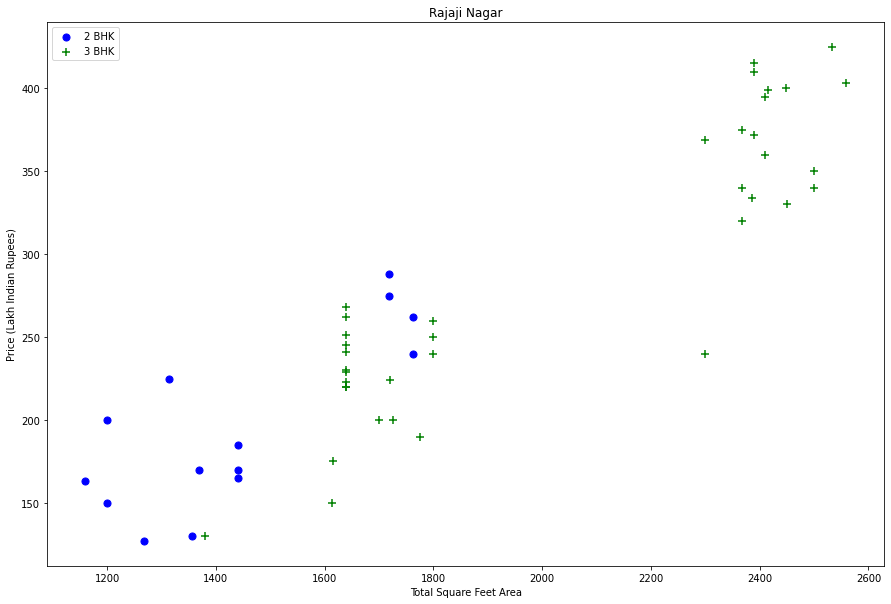

In [39]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

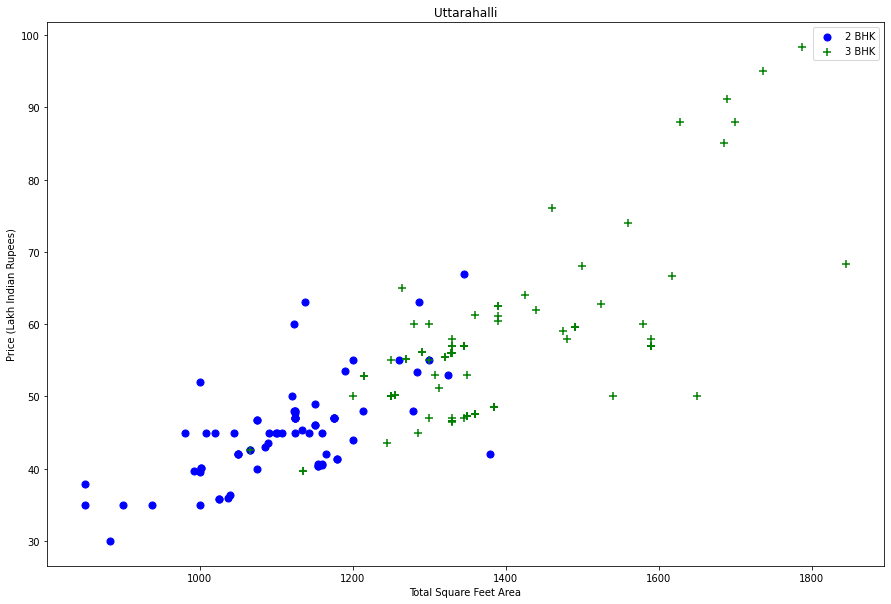

In [40]:
plot_scatter_chart(df7,"Uttarahalli")

At the same price, 2 BHK are costlier than 3 BHK at some points.

In [41]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7131, 7)

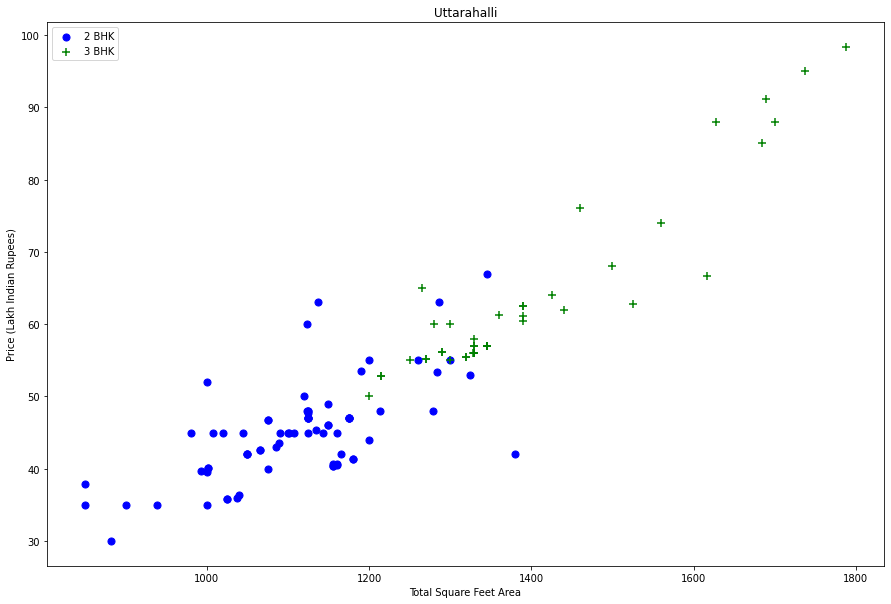

In [42]:
plot_scatter_chart(df8,'Uttarahalli')

Text(0, 0.5, 'Count')

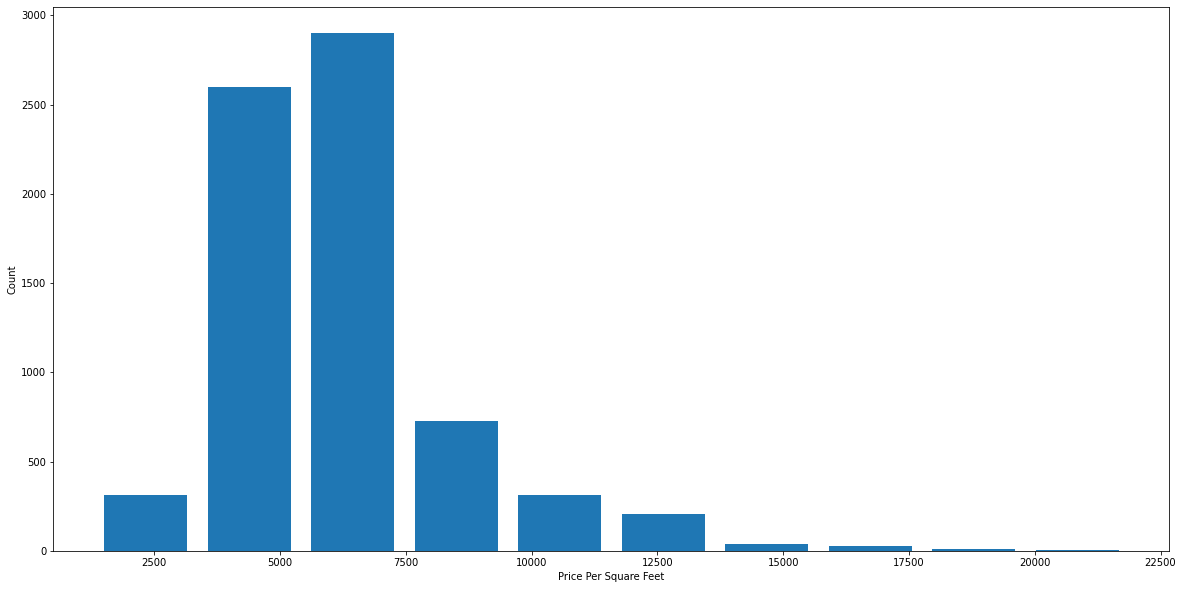

In [43]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Most Houses are in the range less than 10000

In [44]:
df8.bath.unique()

array([ 3.,  5.,  4.,  2.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

There are houses with 16 bathrooms also🙄

In [45]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
8141,other,10 BHK,12000.00,12.00,525.00,10,4375.00
8258,other,16 BHK,10000.00,16.00,550.00,16,5500.00
9178,other,11 BHK,6000.00,12.00,150.00,11,2500.00
9321,other,10 BHK,4000.00,12.00,160.00,10,4000.00
9609,other,13 BHK,5425.00,13.00,275.00,13,5069.12


Text(0, 0.5, 'Count')

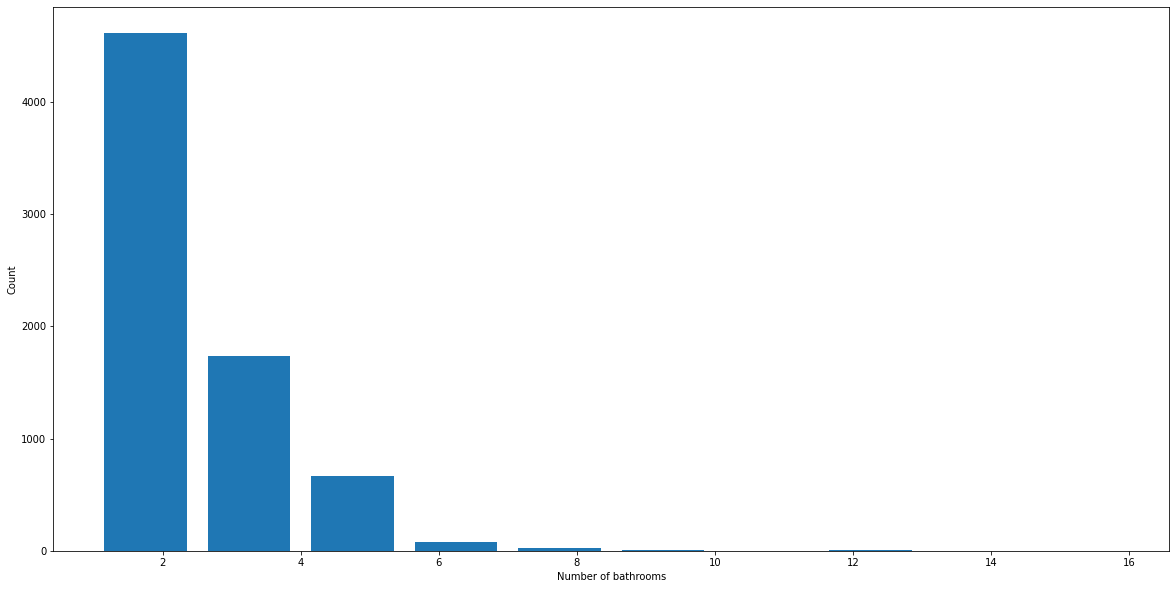

In [46]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [47]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
8141,other,10 BHK,12000.00,12.00,525.00,10,4375.00
8258,other,16 BHK,10000.00,16.00,550.00,16,5500.00
9178,other,11 BHK,6000.00,12.00,150.00,11,2500.00
9321,other,10 BHK,4000.00,12.00,160.00,10,4000.00
9609,other,13 BHK,5425.00,13.00,275.00,13,5069.12


In [48]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
6269,Thanisandra,3 BHK,1806.00,6.00,116.00,3,6423.03
8038,other,6 BHK,11338.00,9.00,1000.00,6,8819.90
9923,other,4 Bedroom,7000.00,8.00,450.00,4,6428.57


In [49]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7054, 7)

Data is almost ready for Machine Learning Training. Just dropping some unneccesary columns

### Model Building

In [50]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk
1,1st Phase JP Nagar,1875.00,3.00,167.00,3
2,1st Phase JP Nagar,1500.00,5.00,85.00,5
3,1st Phase JP Nagar,2065.00,4.00,210.00,3
5,1st Phase JP Nagar,2059.00,3.00,225.00,3
6,1st Phase JP Nagar,1394.00,2.00,100.00,2


In [51]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,Akshaya Nagar,Ambalipura,...,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
1,1st Phase JP Nagar,1875.00,3.00,167.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Phase JP Nagar,1500.00,5.00,85.00,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Phase JP Nagar,2065.00,4.00,210.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1st Phase JP Nagar,2059.00,3.00,225.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1st Phase JP Nagar,1394.00,2.00,100.00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df12 = df11.drop('location',axis='columns')
df12.head()

,total_sqft,bath,price,bhk,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
1,1875.00,3.00,167.00,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1500.00,5.00,85.00,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2065.00,4.00,210.00,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2059.00,3.00,225.00,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1394.00,2.00,100.00,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df12.shape

(7054, 185)

In [55]:
x = df12.drop('price',axis='columns')
x.head()

,total_sqft,bath,bhk,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
1,1875.00,3.00,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1500.00,5.00,5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2065.00,4.00,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2059.00,3.00,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1394.00,2.00,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
y = df12.price
y.head()

1   167.00
2    85.00
3   210.00
5   225.00
6   100.00
Name: price, dtype: float64

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 10)

In [58]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.8516171025038304

**Use K Fold cross validation to measure accuracy of our LinearRegression model**

In [59]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.80780261, 0.83990261, 0.89064743, 0.86459025, 0.80441704])

We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

### Find best model using GridSearchCV

In [60]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,0.84,{'normalize': True}
1,lasso,0.74,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.71,"{'criterion': 'mse', 'splitter': 'best'}"



Based on above results we can say that LinearRegression gives the best score. Hence we will use that.

**Test the model for few properties**

In [61]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(x.columns==location)[0][0]

    z = np.zeros(len(x.columns))
    z[0] = sqft
    z[1] = bath
    z[2] = bhk
    if loc_index >= 0:
        z[loc_index] = 1

    return lr_clf.predict([z])[0]

In [62]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

89.03984560503284

In [63]:
predict_price('Indira Nagar',1000, 2, 2)

171.03873526076646

In [64]:
predict_price('Indira Nagar',1000, 3, 3)

173.73758302339297

### Export the tested model to a pickle file

In [65]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

**Export location and column information to a file that will be useful later on in our prediction application**

In [66]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))